In [95]:
 Import libraries 

In [74]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
 Import Data

In [75]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# Handle missing values and feature engineering
train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Embarked']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

# Split data into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


<Axes: ylabel='Survived'>

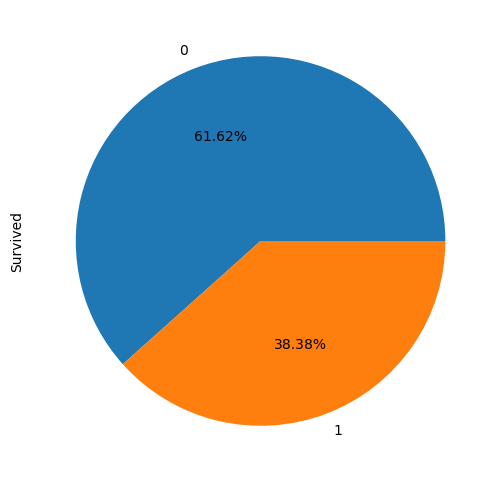

In [97]:
# First look at the overall survival ratio
fig = plt.figure(figsize=(6,6))
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [81]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

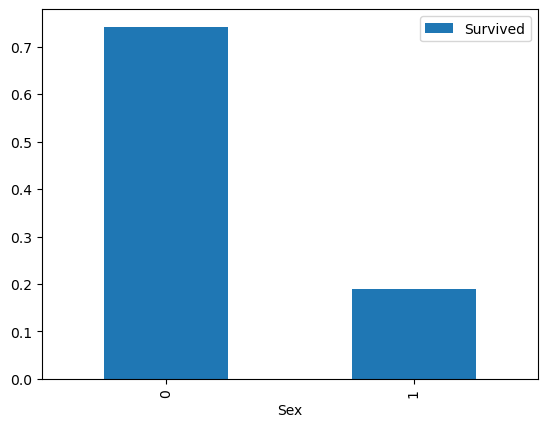

In [82]:
survived_by_sex = train_data[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

In [83]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

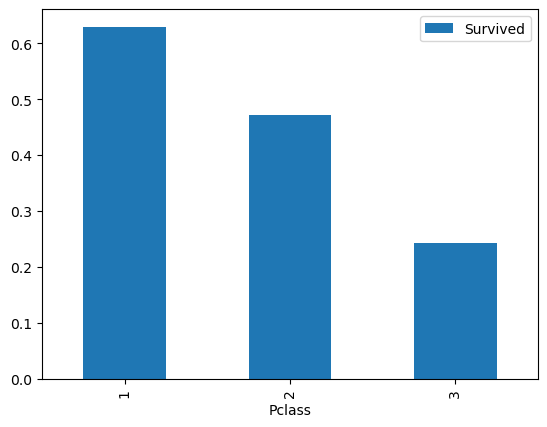

In [84]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [85]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex  Pclass  Survived
0    1       0             3
             1            91
     2       0             6
             1            70
     3       0            72
             1            72
1    1       0            77
             1            45
     2       0            91
             1            17
     3       0           300
             1            47
Name: Survived, dtype: int64

<Axes: xlabel='Pclass,Sex'>

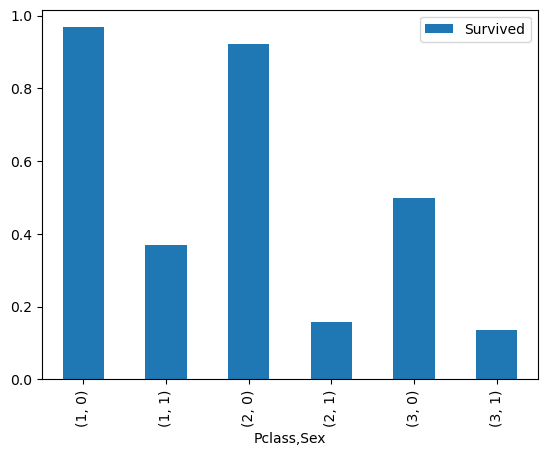

In [86]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

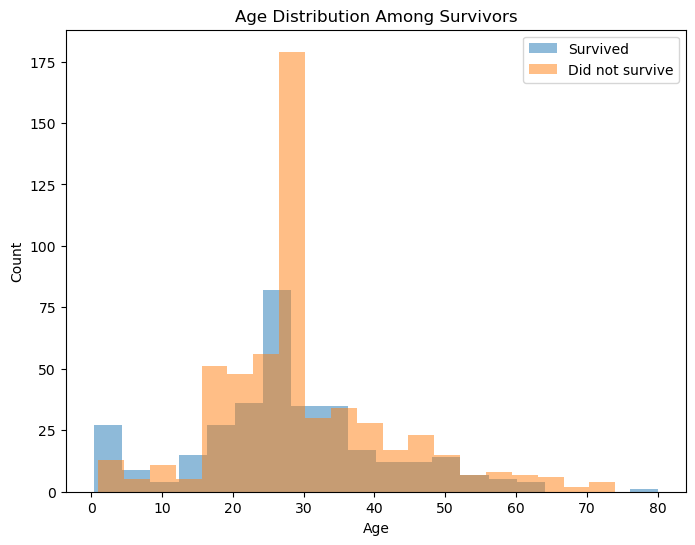

In [87]:
# Example of age distribution among survivors
plt.figure(figsize=(8, 6))
plt.hist(train_data[train_data['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived')
plt.hist(train_data[train_data['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Did not survive')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution Among Survivors')
plt.show()


<Axes: >

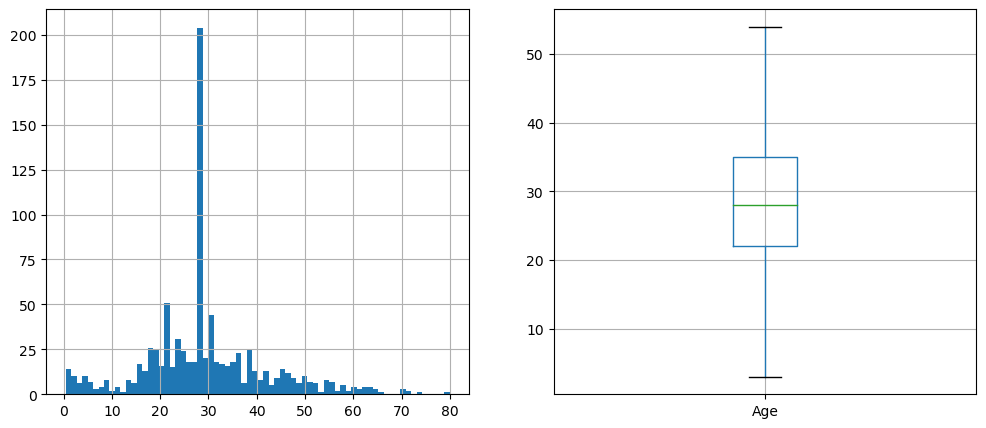

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)

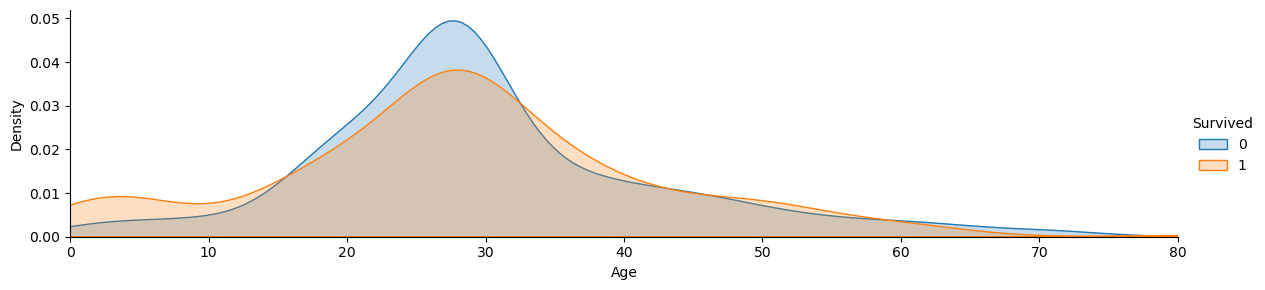

In [89]:
import seaborn as sns
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

In [90]:


# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42)
}

# Create dictionaries to store the results
accuracy_scores = {}
confusion_matrices = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    
    accuracy_scores[model_name] = accuracy
    confusion_matrices[model_name] = confusion_matrix_result

# Print the accuracy scores for each model
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name} Accuracy: {accuracy}")

# Compare confusion matrices
for model_name, conf_matrix in confusion_matrices.items():
    print(f"Confusion Matrix for {model_name}:")
    print(conf_matrix)
    print()


Random Forest Accuracy: 0.8268156424581006
Decision Tree Accuracy: 0.7653631284916201
Logistic Regression Accuracy: 0.776536312849162
Naive Bayes Accuracy: 0.776536312849162
SVM Accuracy: 0.5977653631284916
Confusion Matrix for Random Forest:
[[93 12]
 [19 55]]

Confusion Matrix for Decision Tree:
[[86 19]
 [23 51]]

Confusion Matrix for Logistic Regression:
[[88 17]
 [23 51]]

Confusion Matrix for Naive Bayes:
[[82 23]
 [17 57]]

Confusion Matrix for SVM:
[[103   2]
 [ 70   4]]



In [91]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(conf_matrix)


Accuracy: 0.5977653631284916
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179

[[103   2]
 [ 70   4]]


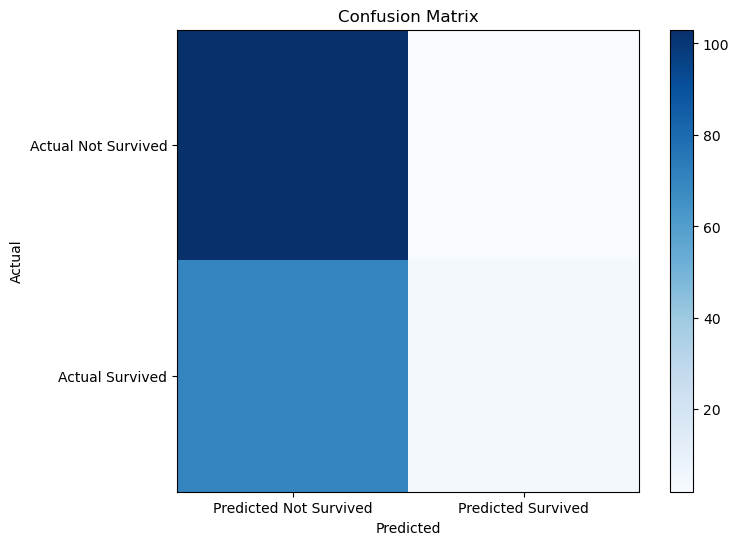

In [92]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Not Survived', 'Predicted Survived'])
plt.yticks([0, 1], ['Actual Not Survived', 'Actual Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [93]:
test_predictions = model.predict(test_data)

# Add predictions to the test dataset
test_data['Survived'] = test_predictions

# You can save the results to a CSV file for submission
test_data[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)


In [94]:
print(test_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
